## Loading Dataset and tools  

In [2]:
import pandas as pd

In [3]:
#loading the training dataset
dataset= pd.read_csv("Datasets/Training.csv")

In [4]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
#dataset shape is 4920/133
dataset.shape

(4920, 133)

In [6]:
#all the available diseases in the dataset
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
#number of diseases
len(dataset['prognosis'].unique())

41

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
x= dataset.drop("prognosis", axis= 1)
y= dataset["prognosis"]

In [10]:
le= LabelEncoder()
le.fit(y)
le.transform(y)

array([15, 15, 15, ..., 38, 35, 27])

In [11]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [12]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state= 20)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3444, 132), (3444,), (1476, 132), (1476,))

## COROLATION MATRIX 

Paires d'attributs fortement corrélés (0.8 à 1.0):
nodal_skin_eruptions - dischromic _patches: 0.872
shivering - watering_from_eyes: 0.923
muscle_wasting - patches_in_throat: 0.882
muscle_wasting - extra_marital_contacts: 0.890
weight_gain - cold_hands_and_feets: 0.934
weight_gain - puffy_face_and_eyes: 0.941
weight_gain - enlarged_thyroid: 0.968
weight_gain - brittle_nails: 0.968
weight_gain - swollen_extremeties: 0.968
anxiety - drying_and_tingling_lips: 0.940
anxiety - slurred_speech: 0.971
anxiety - palpitations: 0.971
cold_hands_and_feets - puffy_face_and_eyes: 0.941
cold_hands_and_feets - enlarged_thyroid: 0.968
cold_hands_and_feets - brittle_nails: 0.968
cold_hands_and_feets - swollen_extremeties: 0.968
mood_swings - abnormal_menstruation: 0.978
patches_in_throat - extra_marital_contacts: 0.890
irregular_sugar_level - increased_appetite: 0.960
irregular_sugar_level - polyuria: 0.960
sunken_eyes - dehydration: 0.877
yellow_urine - receiving_blood_transfusion: 0.973
yellow_urine -

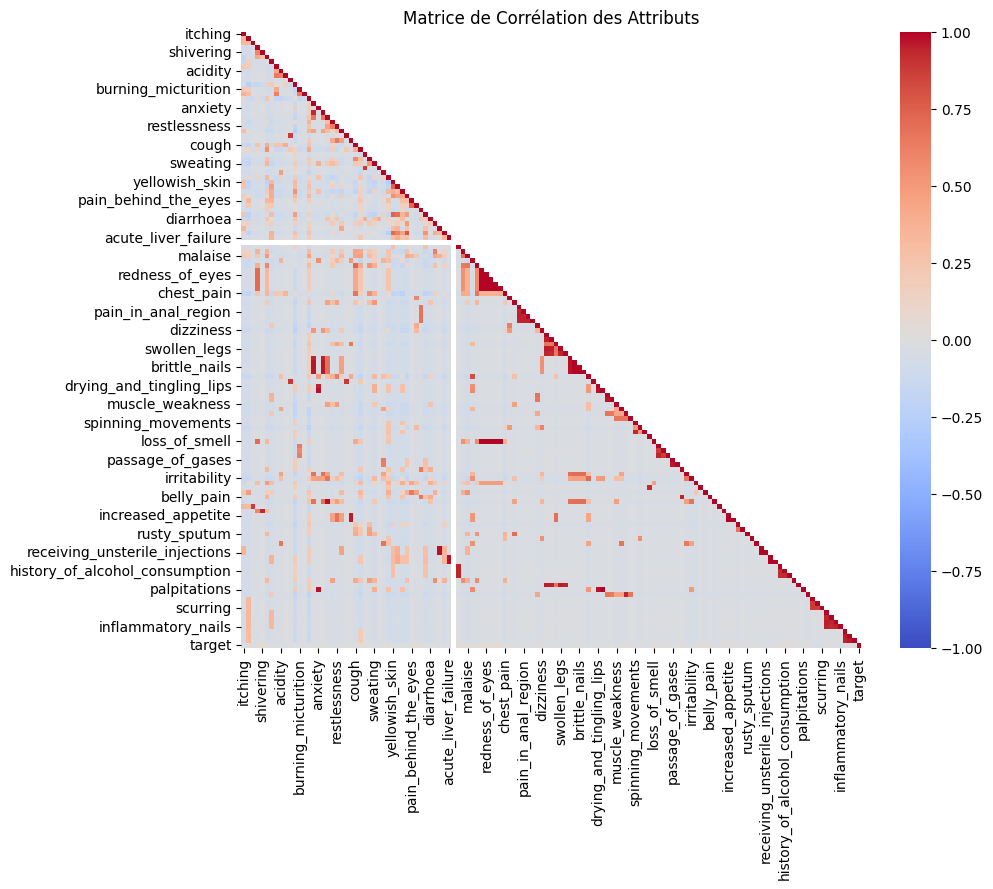

In [14]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First, encode your categorical variables
label_encoder = LabelEncoder()

# Encode target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Encode features
x_train_encoded = x_train.apply(LabelEncoder().fit_transform)
x_test_encoded = x_test.apply(LabelEncoder().fit_transform)

# Créer la matrice de corrélation avec les données encodées
data_encoded = pd.concat([pd.DataFrame(x_train_encoded), pd.Series(y_train_encoded, name='target')], axis=1)
correlation_matrix = data_encoded.corr()

# Trouver les paires d'attributs fortement corrélés (0.8 à 1.0)
strong_correlations = []
n = correlation_matrix.shape[0]
for i in range(n):
    for j in range(i+1, n):
        corr = abs(correlation_matrix.iloc[i, j])
        if 0.8 <= corr <= 1.0:
            attr1 = correlation_matrix.index[i]
            attr2 = correlation_matrix.columns[j]
            strong_correlations.append((attr1, attr2, corr))

# Afficher les résultats
print("Paires d'attributs fortement corrélés (0.8 à 1.0):")
for attr1, attr2, corr in strong_correlations:
    if 'target' in (attr1, attr2):
        print(f"\033[1m{attr1} - {attr2}: {corr:.3f}\033[0m")  # En gras si target est impliqué
    else:
        print(f"{attr1} - {attr2}: {corr:.3f}")

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=False,
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1)
plt.title('Matrice de Corrélation des Attributs')
plt.show()

In [15]:
# Get counts for training set
y_train_counts = pd.Series(y_train).value_counts()

# Get counts for test set (optional)
y_test_counts = pd.Series(y_test).value_counts()

# Store the values
train_distribution = y_train_counts
test_distribution = y_test_counts

print(train_distribution)
print("-----------------------------------")
print(test_distribution)

prognosis
Hypertension                               94
Jaundice                                   92
Heart attack                               92
Acne                                       92
Malaria                                    91
Drug Reaction                              91
Hypoglycemia                               91
Fungal infection                           90
Hepatitis D                                89
hepatitis A                                89
GERD                                       88
Chicken pox                                88
Dimorphic hemmorhoids(piles)               88
Migraine                                   88
Arthritis                                  87
Bronchial Asthma                           87
Urinary tract infection                    86
Hepatitis E                                84
Hyperthyroidism                            84
Tuberculosis                               84
Paralysis (brain hemorrhage)               84
Hepatitis C             

In [16]:
# Create correlation matrix with encoded data
data_encoded = pd.concat([pd.DataFrame(x_train_encoded), pd.Series(y_train_encoded, name='target')], axis=1)
correlation_matrix = data_encoded.corr()

# Get correlations with target and sort them by absolute value
target_correlations = correlation_matrix['target'].drop('target')  # Remove self-correlation
target_correlations_abs = target_correlations.abs().sort_values(ascending=False)

# Get the ordered correlations with their original signs
ordered_correlations = target_correlations[target_correlations_abs.index]

# Display the ordered correlations
print("\nCorrelations with target (ordered by strength):")
print(ordered_correlations)


Correlations with target (ordered by strength):
chills                 0.044511
blackheads            -0.042521
swelling_of_stomach    0.040576
high_fever             0.040229
continuous_sneezing    0.038764
                         ...   
burning_micturition   -0.000942
blood_in_sputum        0.000791
obesity                0.000576
passage_of_gases      -0.000213
fluid_overload              NaN
Name: target, Length: 132, dtype: float64


## Training using SupportVictorClassifier, RandomForestClassifier, GradiantBoostingClassifier, KNN, NaiveBayes

In [17]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

#creating a dictionary to store models
models= {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB()
}
for model_name, model in models.items():
    #training the models
    model.fit(x_train, y_train)

    #testing the models
    predictions= model.predict(x_test)

    #calculationg accuracy
    accuracy= accuracy_score(y_test, predictions)
    print(f"{model_name} accuracy: {accuracy}")

SVC accuracy: 1.0
RandomForest accuracy: 1.0
GradientBoosting accuracy: 1.0
KNeighbors accuracy: 1.0
MultinomialNB accuracy: 1.0


## Confusion Matrix 


SVC Accuracy: 1.0000


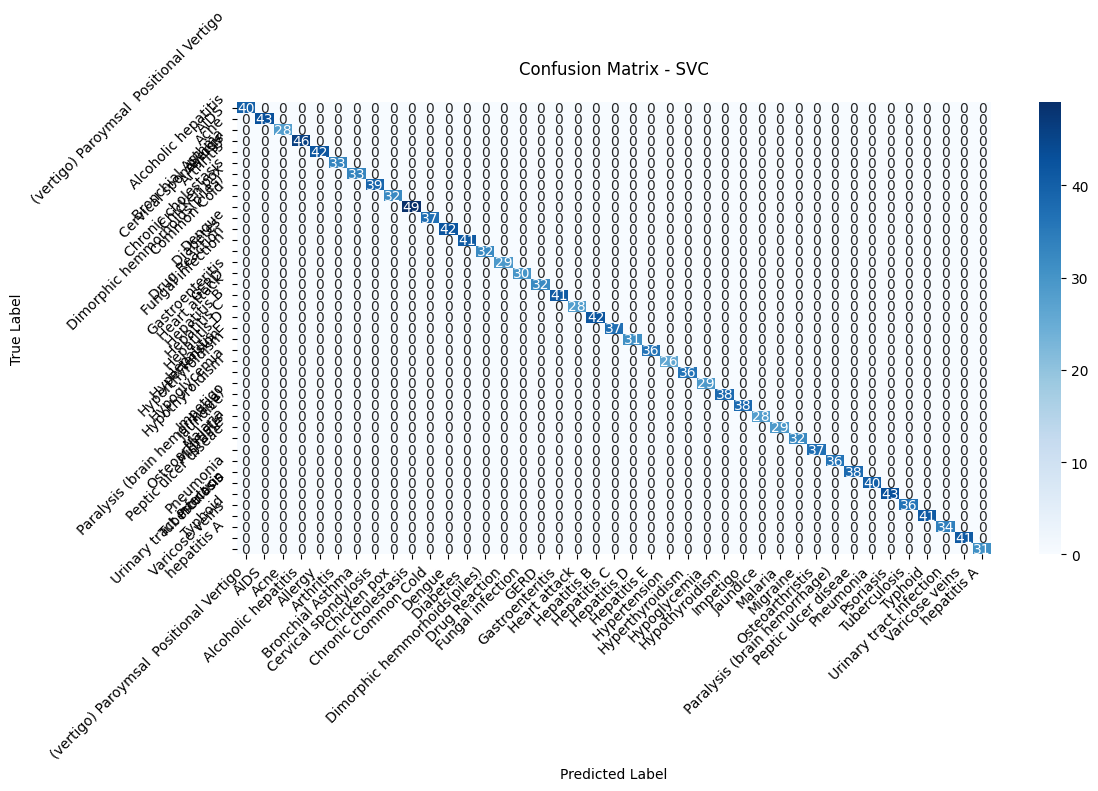


RandomForest Accuracy: 1.0000


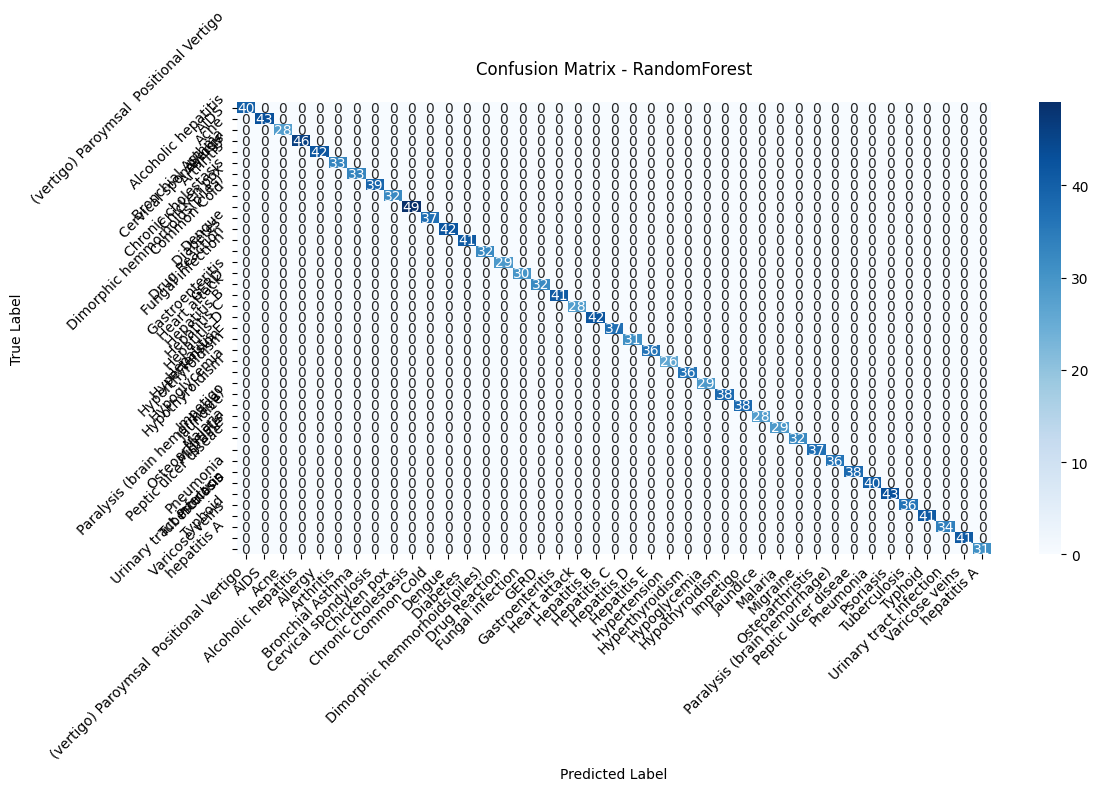


GradientBoosting Accuracy: 1.0000


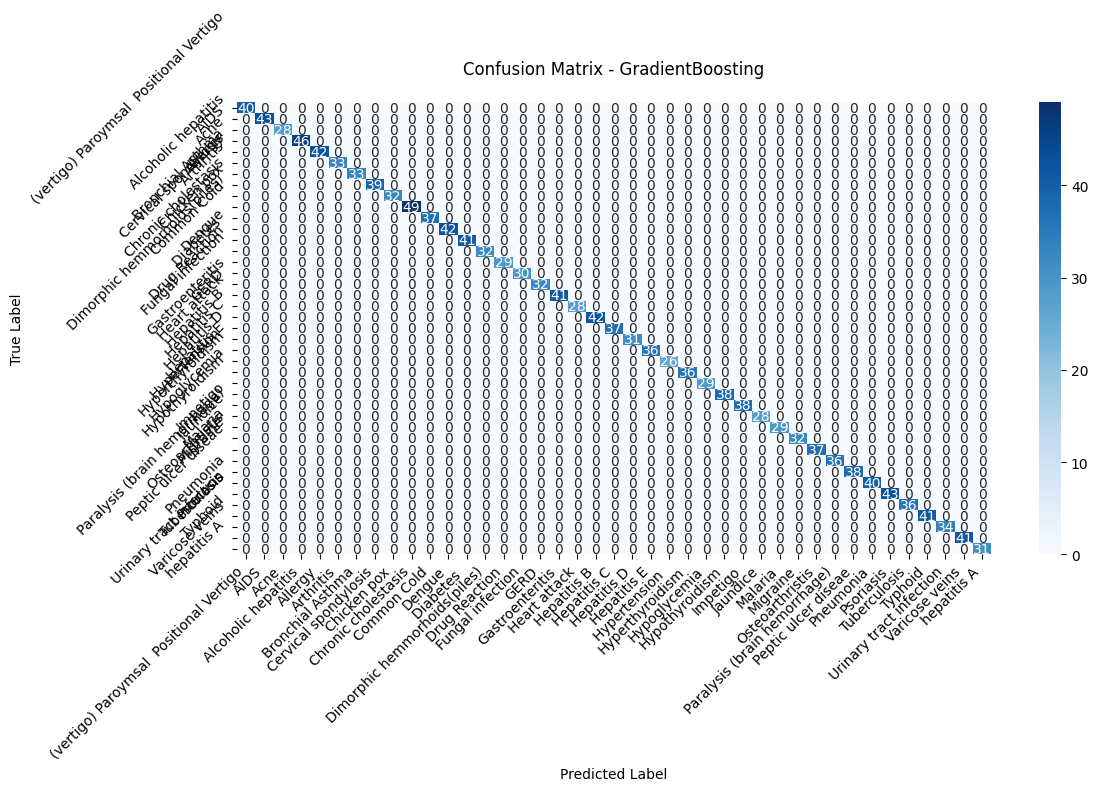


KNeighbors Accuracy: 1.0000


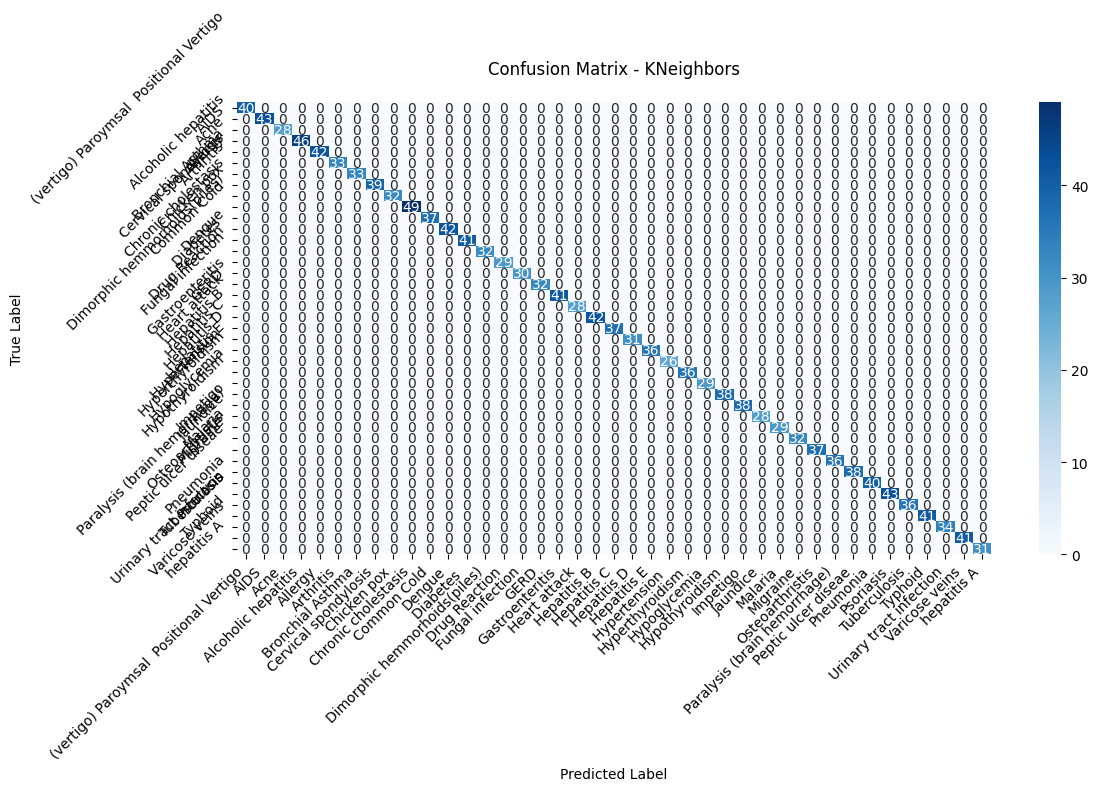


MultinomialNB Accuracy: 1.0000


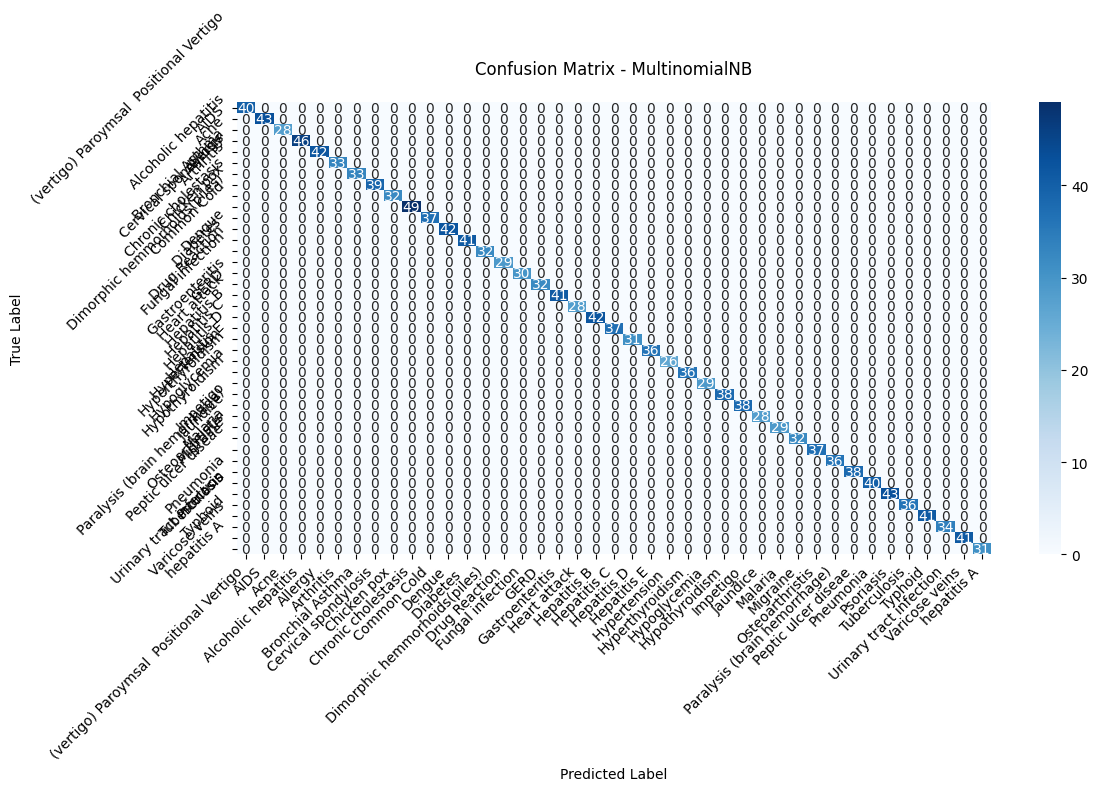

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    plt.figure(figsize=(12, 8))
    cm = confusion_matrix(y_true, y_pred)
    
    sns.heatmap(cm, 
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    
    plt.title(title, pad=20)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Rotate labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for each model
for model_name, model in models.items():
    # Get predictions
    predictions = model.predict(x_test)

    # Print accuracy score
    print(f"\n{model_name} Accuracy: {accuracy_score(y_test, predictions):.4f}")
    
    # Plot the confusion matrix
    plot_confusion_matrix(
        y_test,
        predictions,
        classes=model.classes_,
        title=f'Confusion Matrix - {model_name}'
    )
    


## TESTING 

In [19]:
def predict_symptoms(symptoms_list, model):
    """
    Make prediction based on symptoms
    
    Parameters:
    symptoms_list: list of 132 binary values (0 or 1) corresponding to symptoms
    model: trained RandomForest model
    
    Returns:
    str: predicted disease
    """
    # Convert to numpy array and reshape for single prediction
    symptoms_array = np.array(symptoms_list).reshape(1, -1)
    
    # Make prediction
    prediction = model.predict(symptoms_array)
    return prediction[0] 

# Example usage with different disease patterns:

# Example 1: Paralysis (brain hemorrhage) - First pattern
paralysis_symptoms1 = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print("Example 1 - Paralysis symptoms pattern 1:", predict_symptoms(paralysis_symptoms1, models["RandomForest"]))

# Example 2: Paralysis (brain hemorrhage) - Second pattern
paralysis_symptoms2 = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print("Example 2 - Paralysis symptoms pattern 2:", predict_symptoms(paralysis_symptoms2, models["RandomForest"]))

# Example 3: Jaundice - First pattern
jaundice_symptoms1 = [1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print("Example 3 - Jaundice symptoms pattern 1:", predict_symptoms(jaundice_symptoms1, models["RandomForest"]))

# Example 4: Jaundice - Second pattern (slightly modified from first pattern)
jaundice_symptoms2 = [1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print("Example 4 - Jaundice symptoms pattern 2:", predict_symptoms(jaundice_symptoms2, models["RandomForest"]))

# Example 5: Paralysis (brain hemorrhage)
Paralysis_symptoms_3 = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #Paralysis (brain hemorrhage)
print("Example 5 Paralysis (brain hemorrhage):", predict_symptoms(Paralysis_symptoms_3, models["RandomForest"]))

Example 1 - Paralysis symptoms pattern 1: Paralysis (brain hemorrhage)
Example 2 - Paralysis symptoms pattern 2: Paralysis (brain hemorrhage)
Example 3 - Jaundice symptoms pattern 1: Jaundice
Example 4 - Jaundice symptoms pattern 2: Jaundice
Example 5 Paralysis (brain hemorrhage): Paralysis (brain hemorrhage)


c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid

## Choosing the most efficient model 

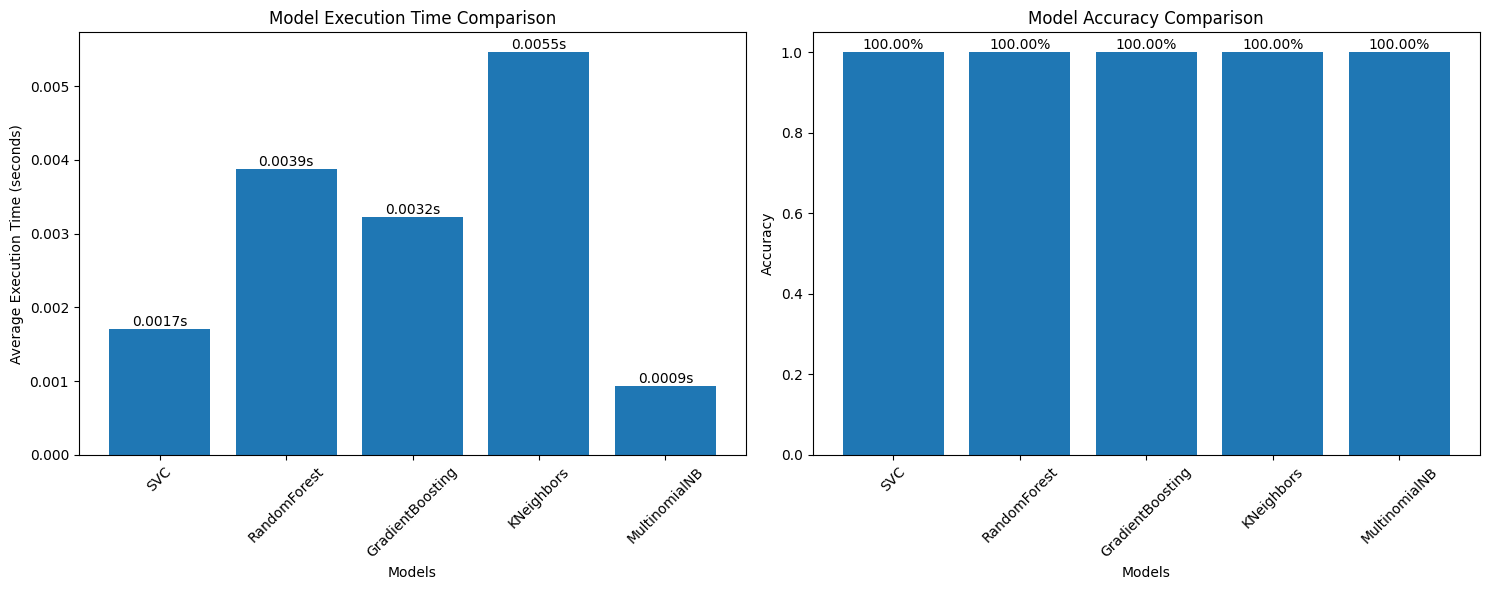


Detailed Results:

SVC:
Average Execution Time: 0.0017 seconds
Average Accuracy: 100.00%

RandomForest:
Average Execution Time: 0.0039 seconds
Average Accuracy: 100.00%

GradientBoosting:
Average Execution Time: 0.0032 seconds
Average Accuracy: 100.00%

KNeighbors:
Average Execution Time: 0.0055 seconds
Average Accuracy: 100.00%

MultinomialNB:
Average Execution Time: 0.0009 seconds
Average Accuracy: 100.00%


In [20]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Function to measure execution time and accuracy for predictions
def measure_performance(model, X_test_samples, y_test_samples, num_iterations=20):
    times = []
    accuracies = []
    predictions_all = []
    
    for _ in range(num_iterations):
        start_time = time.time()
        predictions = model.predict(X_test_samples)
        end_time = time.time()
        
        times.append(end_time - start_time)
        acc = accuracy_score(y_test_samples, predictions)
        accuracies.append(acc)
        predictions_all.append(predictions)
    
    return np.mean(times), np.mean(accuracies), predictions_all

# Randomly select 20 test cases from x_test and y_test
np.random.seed(42)  # for reproducibility
test_indices = np.random.choice(len(x_test), size=20, replace=False)
X_test_sample = x_test.iloc[test_indices]
y_test_sample = y_test.iloc[test_indices]

# Dictionary to store results
results = {}

# Test each model
for model_name, model in models.items():
    exec_time, accuracy, predictions = measure_performance(model, X_test_sample, y_test_sample)
    results[model_name] = {
        'time': exec_time,
        'accuracy': accuracy
    }

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot execution times
names = list(results.keys())
times = [results[name]['time'] for name in names]
ax1.bar(names, times)
ax1.set_title('Model Execution Time Comparison')
ax1.set_xlabel('Models')
ax1.set_ylabel('Average Execution Time (seconds)')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(times):
    ax1.text(i, v, f'{v:.4f}s', ha='center', va='bottom')

# Plot accuracies
accuracies = [results[name]['accuracy'] for name in names]
ax2.bar(names, accuracies)
ax2.set_title('Model Accuracy Comparison')
ax2.set_xlabel('Models')
ax2.set_ylabel('Accuracy')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(accuracies):
    ax2.text(i, v, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("=" * 50)
for model_name in results:
    print(f"\n{model_name}:")
    print(f"Average Execution Time: {results[model_name]['time']:.4f} seconds")
    print(f"Average Accuracy: {results[model_name]['accuracy']:.2%}")

## Saving The Top 3 Models

In [21]:
import pickle
import os

# Create Models directory if it doesn't exist
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the models using pickle
with open(os.path.join(models_dir, 'svc_model.pkl'), 'wb') as f:
    pickle.dump(models["SVC"], f)

with open(os.path.join(models_dir, 'random_forest_model.pkl'), 'wb') as f:
    pickle.dump(models["RandomForest"], f)

with open(os.path.join(models_dir, 'multinomial_nb_model.pkl'), 'wb') as f:
    pickle.dump(models["MultinomialNB"], f)

print("Models saved successfully!")

# To load the models later, you can use:
"""
# Load models
with open(os.path.join(models_dir, 'svc_model.pkl'), 'rb') as f:
    svc_model = pickle.load(f)

with open(os.path.join(models_dir, 'random_forest_model.pkl'), 'rb') as f:
    rf_model = pickle.load(f)

with open(os.path.join(models_dir, 'multinomial_nb_model.pkl'), 'rb') as f:
    nb_model = pickle.load(f)
"""

Models saved successfully!


"\n# Load models\nwith open(os.path.join(models_dir, 'svc_model.pkl'), 'rb') as f:\n    svc_model = pickle.load(f)\n\nwith open(os.path.join(models_dir, 'random_forest_model.pkl'), 'rb') as f:\n    rf_model = pickle.load(f)\n\nwith open(os.path.join(models_dir, 'multinomial_nb_model.pkl'), 'rb') as f:\n    nb_model = pickle.load(f)\n"

### Simulating the model API  

In [22]:
def predict_disease(model_name, symptoms):
    """
    Make prediction using a specified model and symptoms
    
    Parameters:
    model_name (str): Name of the model to use ('svc', 'random_forest', or 'multinomial_nb')
    symptoms (list): List of 132 binary values (0 or 1) representing symptoms
    
    Returns:
    str: Predicted disease
    """
    # Convert symptoms to numpy array and reshape
    symptoms_array = np.array(symptoms).reshape(1, -1)
    
    # Dictionary mapping model names to file paths
    model_files = {
        'svc': 'Models/svc_model.pkl',
        'random_forest': 'Models/random_forest_model.pkl',
        'multinomial_nb': 'Models/multinomial_nb_model.pkl'
    }
    
    # Check if model name is valid
    if model_name.lower() not in model_files:
        raise ValueError("Invalid model name. Choose 'svc', 'random_forest', or 'multinomial_nb'")
    
    # Load the specified model
    with open(model_files[model_name.lower()], 'rb') as f:
        model = pickle.load(f)
    
    # Make prediction
    prediction = model.predict(symptoms_array)
    
    return prediction[0]

# Example usage 1: Fungal infection symptoms
fungal_symptoms = [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Try predictions with different models
print("SVC Prediction:", predict_disease('svc', fungal_symptoms))
print("Random Forest Prediction:", predict_disease('random_forest', fungal_symptoms))
print("MultinomialNB Prediction:", predict_disease('multinomial_nb', fungal_symptoms))

# Example usage 2: Allergy symptoms
allergy_symptoms = [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print("\nPredictions for allergy symptoms:")
print("SVC Prediction:", predict_disease('svc', allergy_symptoms))
print("Random Forest Prediction:", predict_disease('random_forest', allergy_symptoms))
print("MultinomialNB Prediction:", predict_disease('multinomial_nb', allergy_symptoms))

SVC Prediction: Fungal infection
Random Forest Prediction: Fungal infection
MultinomialNB Prediction: Fungal infection

Predictions for allergy symptoms:
SVC Prediction: Allergy
Random Forest Prediction: Allergy
MultinomialNB Prediction: Allergy


c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was 

## Recommendation System

### loading the model

In [23]:
svc= pickle.load(open('Models/Back_up/svc_model.pkl', 'rb'))

### loading the Datasets

In [24]:
sym_disease= pd.read_csv('Datasets/symtoms_df.csv')
precautions= pd.read_csv('Datasets/precautions_df.csv')
recomendations= pd.read_csv('Datasets/workout_df.csv')
description= pd.read_csv('Datasets/description.csv')
medications= pd.read_csv('Datasets/medications.csv')
diets= pd.read_csv('Datasets/diets.csv')

In [25]:
precautions

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [26]:
recomendations

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods
...,...,...,...,...
405,405,405,Impetigo,Consult a healthcare professional
406,406,406,Impetigo,Follow medical recommendations
407,407,407,Impetigo,Avoid scratching
408,408,408,Impetigo,Take prescribed antibiotics


In [27]:
description

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...
5,Peptic ulcer disease,Peptic ulcer disease involves sores that devel...
6,AIDS,AIDS (Acquired Immunodeficiency Syndrome) is a...
7,Diabetes,Diabetes is a chronic condition that affects h...
8,Gastroenteritis,Gastroenteritis is an inflammation of the stom...
9,Bronchial Asthma,Bronchial Asthma is a respiratory condition ch...


In [28]:
medications

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."
5,Peptic ulcer disease,"['Antibiotics', 'Proton Pump Inhibitors (PPIs)..."
6,AIDS,"['Antiretroviral drugs', 'Protease inhibitors'..."
7,Diabetes,"['Insulin', 'Metformin', 'Sulfonylureas', 'DPP..."
8,Gastroenteritis,"['Antibiotics', 'Antiemetic drugs', 'Antidiarr..."
9,Bronchial Asthma,"['Bronchodilators', 'Inhaled corticosteroids',..."


In [29]:
diets

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."
5,Peptic ulcer disease,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
6,AIDS,"['Balanced Diet', 'Protein-rich foods', 'Fruit..."
7,Diabetes,"['Low-Glycemic Diet', 'Fiber-rich foods', 'Lea..."
8,Gastroenteritis,"['Bland Diet', 'Bananas', 'Rice', 'Applesauce'..."
9,Bronchial Asthma,"['Anti-Inflammatory Diet', 'Omega-3-rich foods..."


In [30]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Datasets/Training.csv')

# Create symptoms_list dictionary (maps symptom names to indices)
symptoms = df.columns[:-1]  # All columns except the last one (prognosis)
symptoms_list = {symptom: i for i, symptom in enumerate(symptoms)}

# Create diseases_list dictionary (maps disease names to indices)
diseases = df['prognosis'].unique()
diseases_list = {i: disease for i, disease in enumerate(diseases)}

# Also create a reverse mapping for diseases (useful for predictions)
diseases_index = {disease: i for i, disease in enumerate(diseases)}

# Print the dictionaries to verify
print("Symptoms List Dictionary:")
print(symptoms_list)
print("\nDiseases List Dictionary:")
print(diseases_list)
print("\nDiseases index Dictionary:")
print(diseases_index)

# Save the dictionaries for future use
# import pickle

# with open('Models/symptoms_list.pkl', 'wb') as f:
#     pickle.dump(symptoms_list, f)

# with open('Models/diseases_list.pkl', 'wb') as f:
#     pickle.dump(diseases_list, f)

# with open('Models/diseases_index.pkl', 'wb') as f:
#     pickle.dump(diseases_index, f)

# print("\nDictionaries saved successfully!")

Symptoms List Dictionary:
{'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, '

In [31]:
# symptoms_list = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
# diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
symptoms_list= {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}

diseases_list= {0: 'Fungal infection', 1: 'Allergy', 2: 'GERD', 3: 'Chronic cholestasis', 4: 'Drug Reaction', 5: 'Peptic ulcer diseae', 6: 'AIDS', 7: 'Diabetes ', 8: 'Gastroenteritis', 9: 'Bronchial Asthma', 10: 'Hypertension ', 11: 'Migraine', 12: 'Cervical spondylosis', 13: 'Paralysis (brain hemorrhage)', 14: 'Jaundice', 15: 'Malaria', 16: 'Chicken pox', 17: 'Dengue', 18: 'Typhoid', 19: 'hepatitis A', 20: 'Hepatitis B', 21: 'Hepatitis C', 22: 'Hepatitis D', 23: 'Hepatitis E', 24: 'Alcoholic hepatitis', 25: 'Tuberculosis', 26: 'Common Cold', 27: 'Pneumonia', 28: 'Dimorphic hemmorhoids(piles)', 29: 'Heart attack', 30: 'Varicose veins', 31: 'Hypothyroidism', 32: 'Hyperthyroidism', 33: 'Hypoglycemia', 34: 'Osteoarthristis', 35: 'Arthritis', 36: '(vertigo) Paroymsal  Positional Vertigo', 37: 'Acne', 38: 'Urinary tract infection', 39: 'Psoriasis', 40: 'Impetigo'}
# model prediction function
def get_predicted_value(patient_symptoms):
    input_vector= np.zeros(len(symptoms_list))
    for item in patient_symptoms:
        if item in symptoms_list:
            input_vector[symptoms_list[item]] = 1
        else:
            print(f"Warning: Symptom '{item}' not found in symptoms list")
    prediction = svc.predict([input_vector])[0]
    print(f"Predicted disease: {prediction}")
    # Check if prediction is already a disease name (string)
    if isinstance(prediction, str):
        return prediction
    # If prediction is an index, convert to disease name
    try:
        return diseases_list[prediction]
    except KeyError:
        print(f"Warning: Predicted disease index '{prediction}' not found in diseases list")
        return str(prediction)

#retrieving description,precaution,medication,diet,workout for a certain disease
def little_helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    diet = diets[diets['Disease'] == dis]['Diet']
    diet = [die for die in diet.values]

    recom = recomendations[recomendations['disease'] == dis] ['workout']


    return desc,pre,med,diet,recom


In [32]:
# Testing the function
symptoms= input("Enter the symptoms: ")
user_symptoms= [s.strip() for s in symptoms.split(',')]
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

Predicted disease: Dimorphic hemmorhoids(piles)


c:\Users\souls\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
symptoms

'redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region'

In [34]:
desc, pre, med, diet, recom = little_helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================recomendations==================")
for w_i in recom:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in diet:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Dimorphic hemmorhoids(piles)
=================description==================
Dimorphic hemmorhoids(piles) is a condition characterized by swollen blood vessels in the rectum.
=================precautions==================
1 :  avoid fatty spicy food
2 :  consume witch hazel
3 :  warm bath with epsom salt
4 :  consume alovera juice
=================medications==================
5 :  ['Nitroglycerin', 'Aspirin', 'Beta-blockers', 'Calcium channel blockers', 'Thrombolytic drugs']
=================recomendations==================
6 :  Consume high-fiber foods
7 :  Stay hydrated
8 :  Include nutrient-rich foods
9 :  Consume foods rich in flavonoids
10 :  Limit processed foods
11 :  Avoid spicy and greasy foods
12 :  Consult a healthcare professional
13 :  Practice good hygiene
14 :  Gradually resume normal diet
15 :  Follow medical recommendations
=================diets==================
16 :  ['Hemorrhoids Diet', 'High-Fiber Diet', 'Hydration', 

In [35]:
symptoms

'redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region'

In [36]:
def get_symptom_severity(symptoms_input):
    """
    Returns the severity weight for each symptom in the input list.
    
    Parameters:
    symptoms_input (str or list): Comma-separated string of symptoms or list of symptoms
    
    Returns:
    dict: Dictionary with symptoms as keys and their severity weights as values
    """
    # Load the symptom severity dataset
    import pandas as pd
    import os
    
    severity_df = pd.read_csv(os.path.join('Datasets', 'Symptom-severity.csv'))
    
    # Create a dictionary from the dataset for quick lookup
    severity_dict = dict(zip(severity_df['Symptom'], severity_df['weight']))
    
    # Initialize result dictionary
    result = {}
    
    # Convert input to list if it's a string
    if isinstance(symptoms_input, str):
        symptoms_list = [s.strip() for s in symptoms_input.split(',')]
    else:
        symptoms_list = symptoms_input
    
    # Get severity for each symptom
    for symptom in symptoms_list:
        symptom = symptom.strip()
        # Check if symptom exists in our dataset
        if symptom in severity_dict:
            result[symptom] = severity_dict[symptom]
        else:
            result[symptom] = 0  # Default value if symptom not found
    
    return result

# # Example usage:
# symptoms = 'redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region'
# symptom_severity = get_symptom_severity(symptoms)
# print("Symptom Severity Results:")
# for symptom, severity in symptom_severity.items():
#     print(f"{symptom}: {severity}/7")

# Calculate total severity score
# total_severity = sum(symptom_severity.values())
# print(f"Total Severity Score: {total_severity}")


In [37]:
get_symptom_severity(symptoms)

{'redness_of_eyes': 5,
 'sinus_pressure': 4,
 'runny_nose': 5,
 'congestion': 5,
 'chest_pain': 7,
 'weakness_in_limbs': 7,
 'fast_heart_rate': 5,
 'pain_during_bowel_movements': 5,
 'pain_in_anal_region': 6}

In [38]:
# Get the severity dictionary for all symptoms
severity_dict = get_symptom_severity(symptoms)

# Calculate total severity score
total_severity = sum(severity_dict.values())

# Print the results
print("Symptom Severity Results:")
for symptom, severity in severity_dict.items():
    print(f"{symptom}: {severity}/7")

print(f"\nTotal Severity Score: {total_severity}")

Symptom Severity Results:
redness_of_eyes: 5/7
sinus_pressure: 4/7
runny_nose: 5/7
congestion: 5/7
chest_pain: 7/7
weakness_in_limbs: 7/7
fast_heart_rate: 5/7
pain_during_bowel_movements: 5/7
pain_in_anal_region: 6/7

Total Severity Score: 49
